In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("Dark2")

results = pd.read_parquet("./sampling_scaling_rtt.gzip")
results["timing_model"] = results["timing_model"].astype(
    pd.CategoricalDtype(["fitted-naive", "empirical-low", "empirical-high", "theoretical-low", "theoretical-high"], ordered=True)
)
results["sampling_scheme"] = results["sampling_scheme"].astype(
    pd.CategoricalDtype(
        ['greedy',
         'ideal',
         'adaptive-empirical',
         'adaptive-theoretical',
         'adaptive-fitted-naive',
         'periodic-1.00',
         'periodic-2.00',
         'periodic-3.00',
         'hold-1.00',
         'hold-2.00',
         'hold-3.00'], ordered=True
)
)

results

,rtt,step,previous_ttf,execution_time,step_duration,ttf,wait_time,samples,cumulative_duration,cumulative_samples,repetition,energy,cumulative_energy,timing_model,sampling_scheme
0,2.222222,1,2.222222,3.376112,7.523493,4.147382,1.925160,2,7.523493,2,17,0.228186,0.228186,empirical-high,adaptive-empirical
1,2.222222,2,4.147382,3.816671,6.423186,2.606515,0.384292,1,13.946679,3,17,0.154014,0.382200,empirical-high,adaptive-empirical
2,2.222222,3,2.606515,3.187396,7.124947,3.937551,1.715329,1,21.071626,4,17,0.164541,0.546741,empirical-high,adaptive-empirical
3,2.222222,4,3.937551,4.535454,7.580286,3.044832,0.822610,1,28.651912,5,17,0.171371,0.718112,empirical-high,adaptive-empirical
4,2.222222,5,3.044832,14.593243,18.043961,3.450718,1.228496,5,46.695873,10,17,0.558993,1.277105,empirical-high,adaptive-empirical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2969995,2.222222,96,5.222222,3.502013,8.222222,4.720209,2.497987,2,957.333333,248,8,0.011360,1.825410,theoretical-low,periodic-3.00
2969996,2.222222,97,4.720209,6.522941,11.222222,4.699281,2.477059,3,968.555556,251,8,0.021236,1.846645,theoretical-low,periodic-3.00
2969997,2.222222,98,4.699281,6.668432,11.222222,4.553790,2.331568,3,979.777778,254,8,0.021236,1.867881,theoretical-low,periodic-3.00
2969998,2.222222,99,4.553790,6.951788,11.222222,4.270435,2.048212,3,991.000000,257,8,0.021236,1.889117,theoretical-low,periodic-3.00


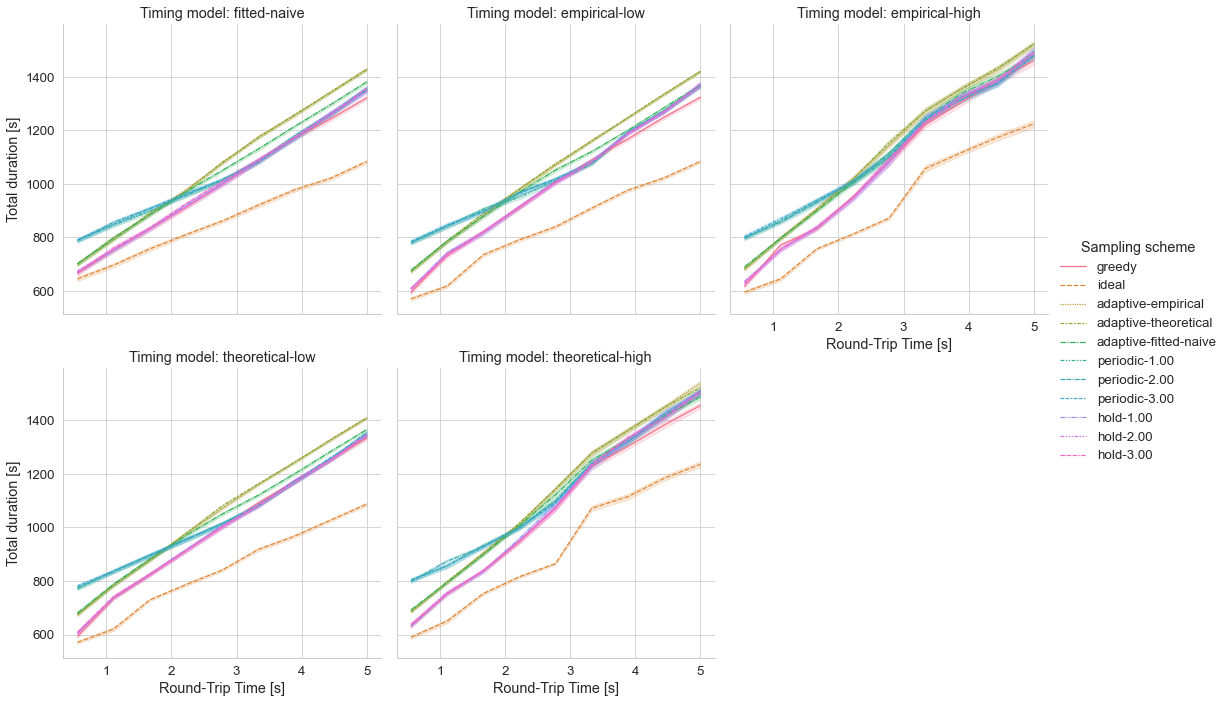

In [2]:
fg = sns.relplot(
    kind="line",
    data=results[results["step"] == results["step"].max()],
    x="rtt",
    y="cumulative_duration",
    hue="sampling_scheme",
    col="timing_model",
    col_wrap=3,
    style="sampling_scheme",
)
fg.set_axis_labels("Round-Trip Time [s]", "Total duration [s]")
fg.legend.set_title("Sampling scheme")
fg.set_titles(col_template="Timing model: {col_name}")
plt.show()

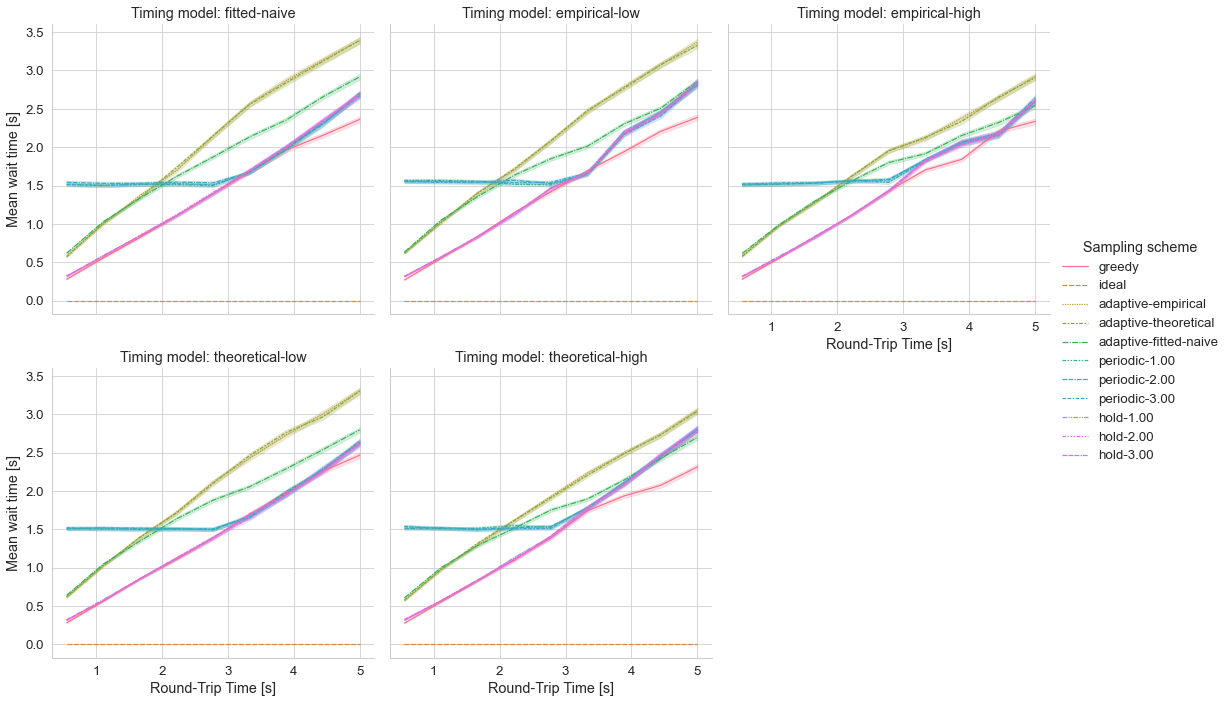

In [3]:
fg = sns.relplot(
    kind="line",
    data=results,
    x="rtt",
    y="wait_time",
    hue="sampling_scheme",
    col="timing_model",
    col_wrap=3,
    style="sampling_scheme",
)
fg.set_axis_labels("Round-Trip Time [s]", "Mean wait time [s]")
fg.legend.set_title("Sampling scheme")
fg.set_titles(col_template="Timing model: {col_name}")
plt.show()

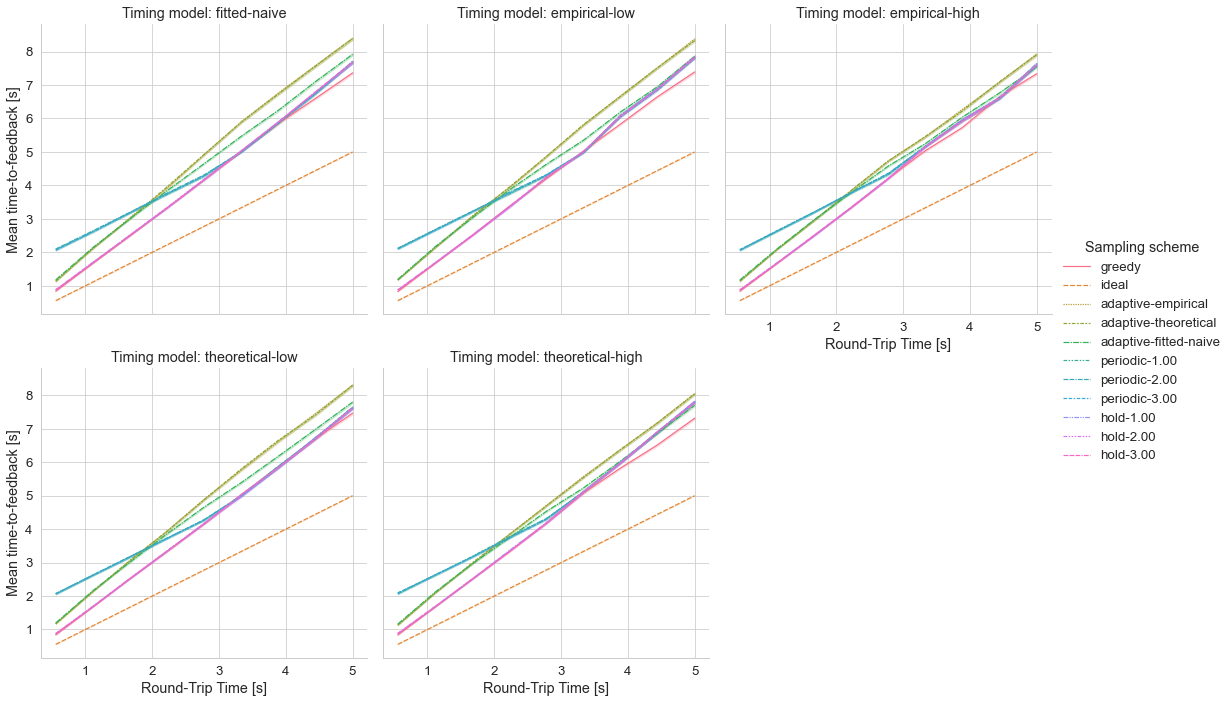

In [4]:
fg = sns.relplot(
    kind="line",
    data=results,
    x="rtt",
    y="ttf",
    hue="sampling_scheme",
    col="timing_model",
    col_wrap=3,
    style="sampling_scheme",
)
fg.set_axis_labels("Round-Trip Time [s]", "Mean time-to-feedback [s]")
fg.legend.set_title("Sampling scheme")
fg.set_titles(col_template="Timing model: {col_name}")
plt.show()

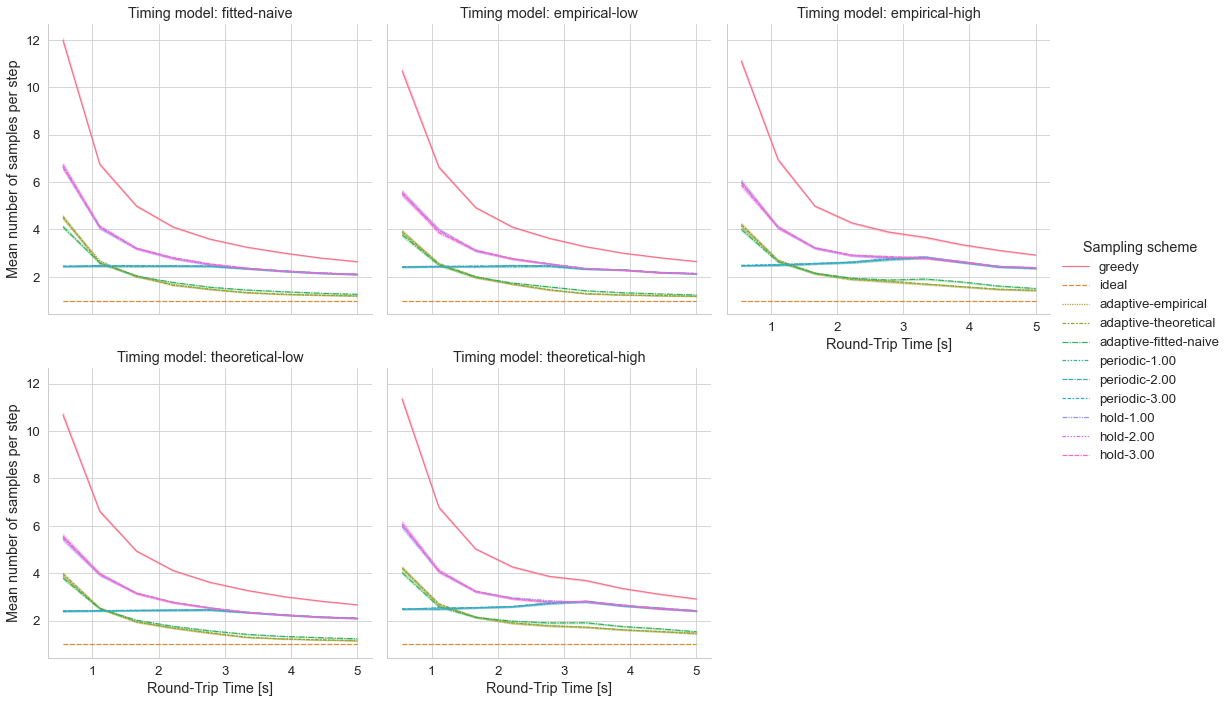

In [5]:
fg = sns.relplot(
    kind="line",
    data=results,
    x="rtt",
    y="samples",
    hue="sampling_scheme",
    col="timing_model",
    col_wrap=3,
    style="sampling_scheme",
)
fg.set_axis_labels("Round-Trip Time [s]", "Mean number of samples per step")
fg.legend.set_title("Sampling scheme")
fg.set_titles(col_template="Timing model: {col_name}")
plt.show()

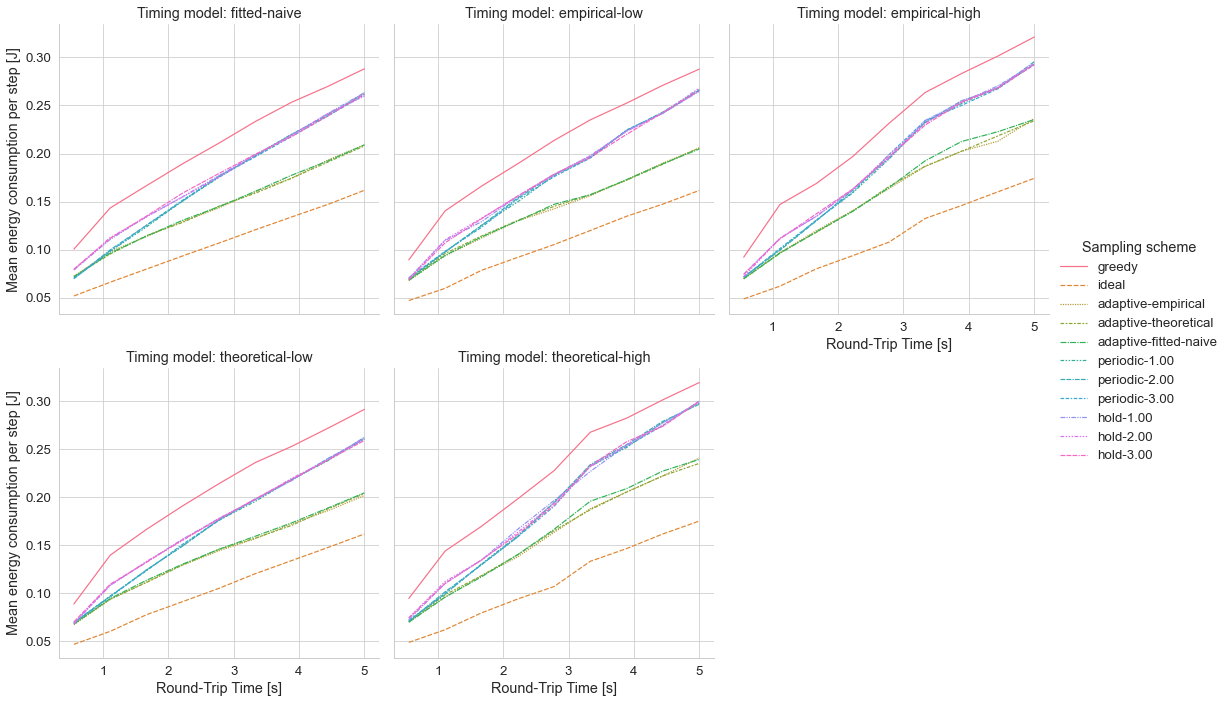

In [7]:
fg = sns.relplot(
    kind="line",
    data=results,
    x="rtt",
    y="energy",
    hue="sampling_scheme",
    col="timing_model",
    col_wrap=3,
    style="sampling_scheme",
    errorbar=None,
)
fg.set_axis_labels("Round-Trip Time [s]", "Mean energy consumption per step [J]")
fg.legend.set_title("Sampling scheme")
fg.set_titles(col_template="Timing model: {col_name}")
plt.show()

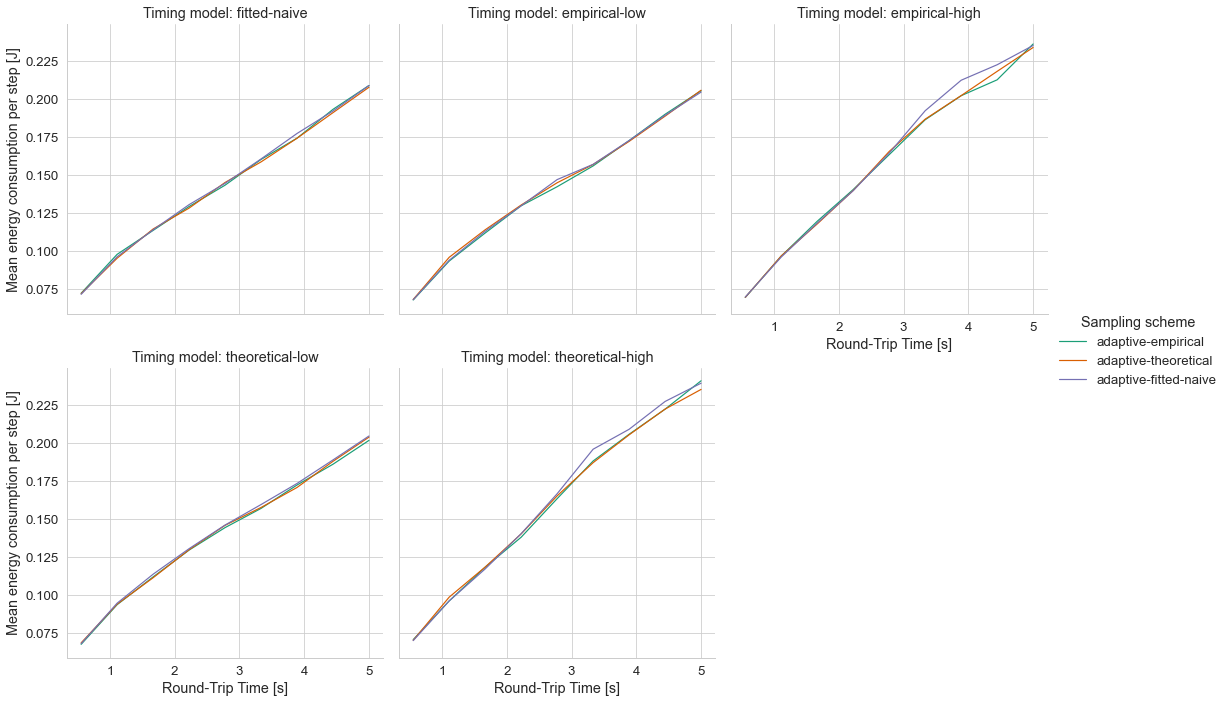

In [16]:
fg = sns.relplot(
    kind="line",
    data=results,
    x="rtt",
    y="energy",
    hue="sampling_scheme",
    hue_order=["adaptive-empirical", "adaptive-theoretical", "adaptive-fitted-naive"],
    col="timing_model",
    col_wrap=3,
    # style="sampling_scheme",
    # style_order=["adaptive-empirical", "adaptive-theoretical", "adaptived-fitted-naive"],
    errorbar=None,
)
fg.set_axis_labels("Round-Trip Time [s]", "Mean energy consumption per step [J]")
fg.legend.set_title("Sampling scheme")
fg.set_titles(col_template="Timing model: {col_name}")
# fg.set(xlim=(0, 3), ylim=(None, 0.2))
plt.show()

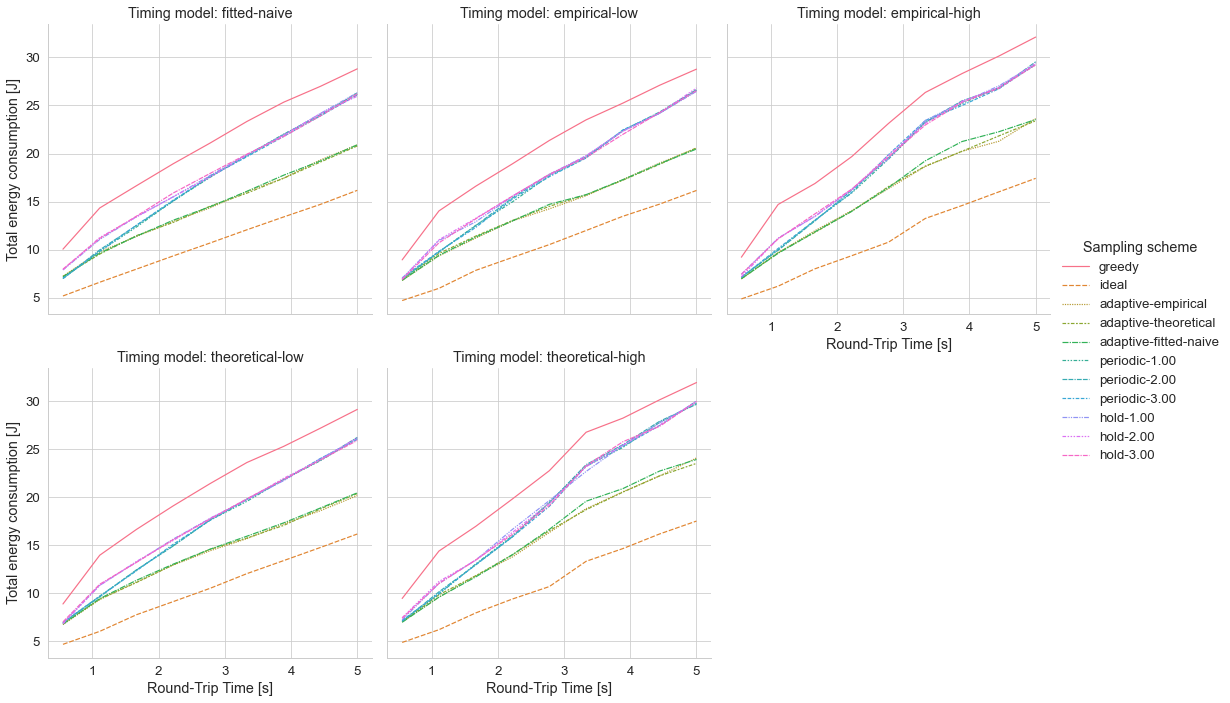

In [17]:
fg = sns.relplot(
    kind="line",
    data=results[results["step"] == results["step"].max()],
    x="rtt",
    y="cumulative_energy",
    hue="sampling_scheme",
    col="timing_model",
    col_wrap=3,
    style="sampling_scheme",
    errorbar=None,
)
fg.set_axis_labels("Round-Trip Time [s]", "Total energy consumption [J]")
fg.legend.set_title("Sampling scheme")
fg.set_titles(col_template="Timing model: {col_name}")
plt.show()